<a href="https://colab.research.google.com/github/hyxxnii/NLP-Practice/blob/master/RNN%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%B6%84%EB%A5%98/2.%20%EB%A1%9C%EC%9D%B4%ED%84%B0%20%EB%89%B4%EC%8A%A4%20%EB%B6%84%EB%A5%98(Reuters%20News%20Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://wikidocs.net/22933

케라스에서 제공하는 로이터 뉴스 데이터를 LSTM을 이용하여 텍스트 분류를 해보자.

로이터 뉴스 기사 데이터는 총 11,258개의 뉴스 기사가 46개의 뉴스 카테고리로 분류된다.

## 데이터 불러오기

In [2]:
from tensorflow.keras.datasets import reuters
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
# num_words: 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지만 사용할 것인지 결정
# ex) num_words=100: 등장 빈도 순위가 1~100에 해당하는 단어만 사용

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [7]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

# 주어진 데이터는 이미 토큰화와 정수 인코딩이 끝난 상태

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


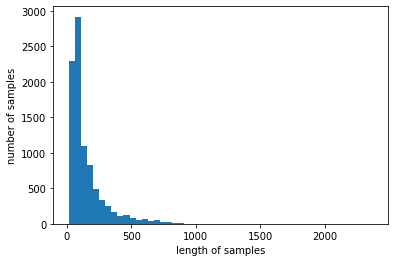

In [8]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 대체적으로 대부분의 뉴스가 100~200 사이의 길이를 가진다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


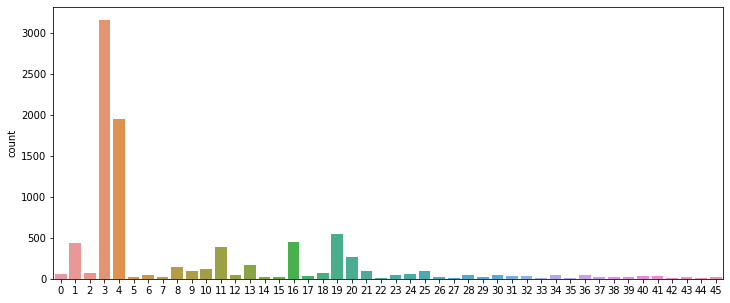

In [10]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)
plt.show()
# 3, 4가 가장 많은 레이블을 차지한다.

In [13]:
# 각 레이블에 대한 정확한 개수
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))


각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_to_index = reuters.get_word_index()
print(word_to_index)

출력셀 생략

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, - 이하 생략 -}


In [18]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [19]:
print('빈도수 상위 28842번 단어 : {}'.format(index_to_word[28842]))

빈도수 상위 28842번 단어 : nondiscriminatory


In [20]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))

빈도수 상위 1번 단어 : the


In [22]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

# x_train[0] 복원 (전처리된 토큰들이라 완전한 문장은 아님)
print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


## 2. LSTM으로 로이터 뉴스 분류하기

In [23]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [24]:
# 모델 학습에는 등장 빈도 순서가 가장 많은 상위 1~1000번째 단어들만 사용
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [25]:
# 패딩
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len) 

In [26]:
# 레이블 원-핫 인코딩
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

Embedding()은 최소 두 개의 인자 필요
- 단어 집합의 크기
- 임베딩 벡터의 차원

In [27]:
model = Sequential()
model.add(Embedding(1000, 120)) 
model.add(LSTM(120)) # hidden_size
model.add(Dense(46, activation='softmax'))

In [28]:
# 과적합 방지를 위한 조기 종료]
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# ModelCheckpoint: 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('Reuters_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [29]:
# 다중 클래스 분류: 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [30]:
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

# 케라스의 model.fit()에서 validation_data는 실제로 model이 데이터를 훈련하지는 않고 
# 에포크마다 정확도와 loss를 출력하여 과적합을 판단하기 위한 용도로만 사용

Epoch 1/30
71/71 [==============================] - 19s 241ms/step - loss: 2.5730 - acc: 0.3621 - val_loss: 2.1294 - val_acc: 0.4884

Epoch 00001: val_acc improved from -inf to 0.48842, saving model to Reuters_best_model.h5
Epoch 2/30
71/71 [==============================] - 17s 234ms/step - loss: 2.0605 - acc: 0.4905 - val_loss: 2.0120 - val_acc: 0.5085

Epoch 00002: val_acc improved from 0.48842 to 0.50846, saving model to Reuters_best_model.h5
Epoch 3/30
71/71 [==============================] - 17s 234ms/step - loss: 2.0114 - acc: 0.5003 - val_loss: 1.9219 - val_acc: 0.5236

Epoch 00003: val_acc improved from 0.50846 to 0.52360, saving model to Reuters_best_model.h5
Epoch 4/30
71/71 [==============================] - 17s 235ms/step - loss: 1.8064 - acc: 0.5439 - val_loss: 1.7462 - val_acc: 0.5606

Epoch 00004: val_acc improved from 0.52360 to 0.56055, saving model to Reuters_best_model.h5
Epoch 5/30
71/71 [==============================] - 17s 235ms/step - loss: 1.6895 - acc: 0.5632

In [31]:
loaded_model = load_model('Reuters_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

# 모델이 학습하지 않은 데이터인 X_test, y_test를 테스트 데이터로서 
# 성능 평가 용도로 model.evaluate()에서도 다시 사용 
# => 즉 이번 모델은 검증 데이터=테스트 데이터(데이터가 충분하다면 다르게 사용하자)

71/71 [==============================] - 2s 20ms/step - loss: 1.1831 - acc: 0.7124

 테스트 정확도: 0.7124


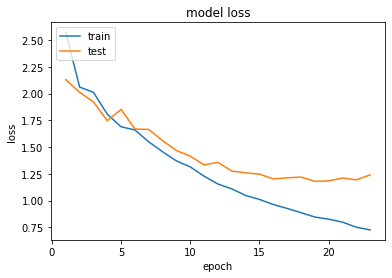

In [32]:
# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

전체적으로는 검증 데이터의 손실이 줄어드는 경향이 있지만 뒤로 갈수록 점차 검증 데이터의 손실이 증가하려고 하는 경향이 보인다.
=> 과적합의 신호